# BALANCING THE SCALE IN RECRUITMENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
file_path =  "C:/Users/TeklehaimanotMekonen/Downloads/Balancing the scale/applicants.xlsx"

ap_data = pd.read_excel(file_path, sheet_name = 0)
ap_data.head()

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills
0,1,Bachelor's degree,1,5,1,1
1,2,Master's degree,1,5,1,1
2,3,Associate's degree,1,3,1,1
3,4,"Some college, no degree",1,7,1,1
4,5,Master's degree,1,4,1,2


### Feature description:

   * Appl_Id:             applicant identifiable id given

   * Edu_level:             education level of applicants

   * Visa_status:           applicant residence statuse, whether applicant is eligible to work                                in the country or not. 1 = Yes  0 = No

   * Yrs_Rel_wo_expr:       the number of years of applicant work experience in a relevant field

   * Relevant_skills:       skills the applicant must have in regard to job title 1 = Yes  2 =                                Some    3 = No
                         
   * Relevant_soft_skills:  1 = Yes      2 = No 


In [3]:
ap_data.shape

(60, 6)

### Overview of applicants by their education level

In [4]:
edu_da = ap_data.groupby("Edu_level")["Appl_Id"].count().reset_index(
                          name="count") #.set_index('Edu_level')
edu_da

,Edu_level,count
0,Associate's degree,12
1,Bachelor's degree,19
2,Master's degree,19
3,"Some college, no degree",10


In [5]:
edu_da = ap_data.groupby("Edu_level")["Appl_Id"].count().reset_index(
                          name="count").set_index('Edu_level')

#edu_da["Percentage"] = (edu_da/edu_da.sum()*100).round(2) #.astype(str) + '%'
edu_da["Percentage(%)"] = (edu_da["count"]/edu_da["count"].sum()*100).round(2)
edu_da.loc["Total",:] = edu_da.sum(axis=0)
edu_da

,count,Percentage(%)
Edu_level,,
Associate's degree,12.0,20.00
Bachelor's degree,19.0,31.67
Master's degree,19.0,31.67
"Some college, no degree",10.0,16.67
Total,60.0,100.01


<Figure size 1800x576 with 0 Axes>

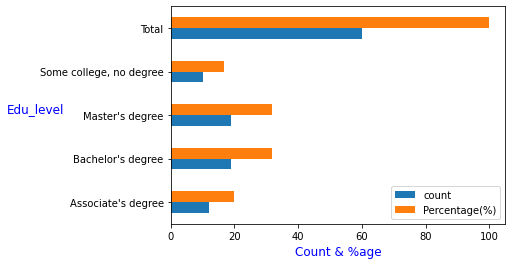

In [6]:
fig = plt.figure(figsize=(25,8))

edu_da.plot(kind="barh")
plt.xlabel("Count & %age", color="blue", size=12)
plt.ylabel("Edu_level", rotation=0, color="blue", size=12)
plt.draw()

plt.savefig('edu.png')

plt.show()

### Overview of applicants by visa_status!

In [7]:
Status_da = ap_data.groupby("Visa_status")["Appl_Id"].count().reset_index(
            name="count").set_index('Visa_status').rename(index={1:'Has_Visa', 0: 'No_Visa'})

Status_da["Percentage(%)"] = (Status_da["count"]/Status_da["count"].sum()*100).round(2)  

Status_da.loc["Total",:] = Status_da.sum(axis=0) 
Status_da

,count,Percentage(%)
Visa_status,,
No_Visa,13.0,21.67
Has_Visa,47.0,78.33
Total,60.0,100.00


[]

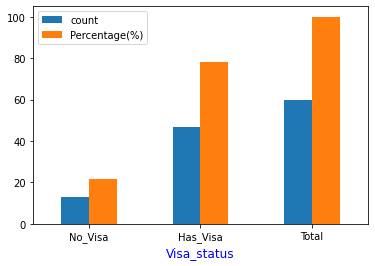

In [8]:
Status_da.plot(kind="bar", rot=0)
plt.savefig("status.png")
plt.xlabel("Visa_status", color="blue", size=12)
plt.plot()

### Condition to be short listed or not

In [9]:
condition = [(ap_data["Visa_status"]==1) & (ap_data["Yrs_Rel_wo_expr"]>=2) & 
             (ap_data["Relevant_skills"]<=2) & (ap_data["Relevant_soft_skills"]==1),
             
             (ap_data["Visa_status"]==0) & (ap_data["Yrs_Rel_wo_expr"]<2) & 
             (ap_data["Relevant_skills"]==3) & (ap_data["Relevant_soft_skills"]==2)
            ]

values = [1, 0]

In [10]:
ap_data['short_listed'] = np.select(condition, values)
ap_data.head()

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed
0,1,Bachelor's degree,1,5,1,1,1
1,2,Master's degree,1,5,1,1,1
2,3,Associate's degree,1,3,1,1,1
3,4,"Some college, no degree",1,7,1,1,1
4,5,Master's degree,1,4,1,2,0


### Overview of Selected applicants!

In [11]:
Short_li = ap_data.groupby("short_listed")["Appl_Id"].count().reset_index(
           name="count").set_index('short_listed').rename(index={1:'Selected', 0: 'Not_selected'})

Short_li["Percentage(%)"] = (Short_li/Short_li.sum()*100).round(2)  

Short_li.loc["Total",:] = Short_li.sum(axis=0) 
Short_li

,count,Percentage(%)
short_listed,,
Not_selected,32.0,53.33
Selected,28.0,46.67
Total,60.0,100.00


<Figure size 720x576 with 0 Axes>

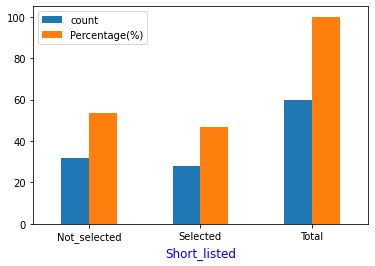

In [12]:
fig = plt.figure(figsize=(10,8))

Short_li.plot(kind="bar", rot=0)
plt.xlabel("Short_listed", color="blue", size=12)
plt.draw()
plt.savefig("shortlist.png")

plt.show()

### Filtering the selected one's

In [13]:
Short_li = ap_data[ap_data["short_listed"] ==1]
Short_li.head()

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed
0,1,Bachelor's degree,1,5,1,1,1
1,2,Master's degree,1,5,1,1,1
2,3,Associate's degree,1,3,1,1,1
3,4,"Some college, no degree",1,7,1,1,1
5,6,Associate's degree,1,4,1,1,1


In [14]:
#ap_data = ap_data[ap_data["short_listed"] ==1]
#ap_data.head()

In [15]:
Short_li.shape

(28, 7)

In [16]:
ap_data.shape

(60, 7)

In [17]:
ap_data.head()

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed
0,1,Bachelor's degree,1,5,1,1,1
1,2,Master's degree,1,5,1,1,1
2,3,Associate's degree,1,3,1,1,1
3,4,"Some college, no degree",1,7,1,1,1
4,5,Master's degree,1,4,1,2,0


### Record of selected applicants by their Education level

In [18]:
Edu_selected = Short_li.groupby("Edu_level")["Appl_Id"].count().reset_index(name="count").set_index('Edu_level')
Edu_selected["Percentage(%)"] = (Edu_selected["count"]/Edu_selected["count"].sum()*100).round(0) #.astype(int) 
Edu_selected.loc["Total",:] = Edu_selected.sum(axis=0) 
Edu_selected

,count,Percentage(%)
Edu_level,,
Associate's degree,6.0,21.0
Bachelor's degree,9.0,32.0
Master's degree,8.0,29.0
"Some college, no degree",5.0,18.0
Total,28.0,100.0


In [19]:
#Edu_selected = ap_data.groupby("Edu_level")["Appl_Id"].count().reset_index(name="count").set_index('Edu_level')
#Edu_selected["Percentage(%)"] = (Edu_selected["count"]/Edu_selected["count"].sum()*100).round(0) #.astype(int) 
#Edu_selected.loc["Total",:] = Edu_selected.sum(axis=0) 
#Edu_selected

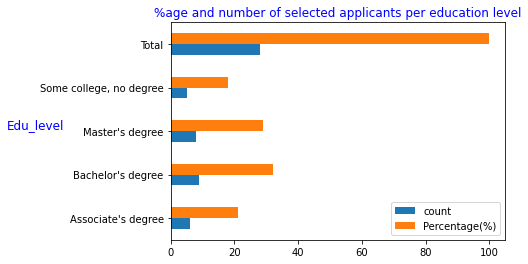

In [20]:
#fig = plt.figure(figsize=(12,10))

Edu_selected.plot(kind="barh", align="center")
plt.ylabel("Edu_level", rotation=0, color="blue", size=12)
plt.title("%age and number of selected applicants per education level", color="blue", size=12)
plt.savefig("selected_by_edu.png")

plt.show()

### Record of selected applicants by their Yrs_of_work experience

In [21]:
Work_exp = Short_li.groupby("Yrs_Rel_wo_expr")["Appl_Id"].count().reset_index(
           name="count").set_index('Yrs_Rel_wo_expr').rename(index={
           2:'Two_yrs', 3: 'Three_yrs', 4: "Four_yrs", 5: "Five_yrs", 6: "Six_yrs",
           7: "Seven_yrs", 9: "Nine_yrs", 11: "Eleven_yrs", 14: "Fourteen_yrs"})
Work_exp["Percentage(%)"] = (Work_exp/Work_exp.sum()*100).round(2)  
Work_exp.loc["Total",:] = Work_exp.sum(axis=0) 
Work_exp

,count,Percentage(%)
Yrs_Rel_wo_expr,,
Two_yrs,4.0,14.29
Three_yrs,7.0,25.00
Four_yrs,2.0,7.14
Five_yrs,5.0,17.86
Six_yrs,4.0,14.29
Seven_yrs,3.0,10.71
Nine_yrs,1.0,3.57
Eleven_yrs,1.0,3.57
Fourteen_yrs,1.0,3.57


In [22]:
#Work_exp = ap_data.groupby("Yrs_Rel_wo_expr")["Appl_Id"].count().reset_index(
#           name="count").set_index('Yrs_Rel_wo_expr').rename(index={
#           2:'Two_yrs', 3: 'Three_yrs', 4: "Four_yrs", 5: "Five_yrs", 6: "Six_yrs",
#           7: "Seven_yrs", 9: "Nine_yrs", 11: "Eleven_yrs", 14: "Fourteen_yrs"})
#Work_exp["Percentage(%)"] = (Work_exp/Work_exp.sum()*100).round(2)  
#Work_exp.loc["Total",:] = Work_exp.sum(axis=0) 
#Work_exp

<Figure size 864x720 with 0 Axes>

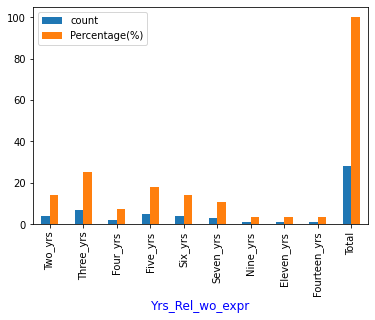

In [23]:
fig = plt.figure(figsize=(12,10))

Work_exp.plot(kind="bar", align="center")
plt.xlabel("Yrs_Rel_wo_expr", color="blue", size=12)
plt.savefig("selected_by_yrs_exp.png")

plt.show();

### Condition that determines applicants passed for an interview

In [24]:
ap_data["Interviewed"] = np.where((ap_data["short_listed"]==1) & (ap_data["Yrs_Rel_wo_expr"]>=5) & (ap_data["Relevant_skills"]==1),"Yes", "No")
ap_data

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed,Interviewed
0,1,Bachelor's degree,1,5,1,1,1,Yes
1,2,Master's degree,1,5,1,1,1,Yes
2,3,Associate's degree,1,3,1,1,1,No
3,4,"Some college, no degree",1,7,1,1,1,Yes
4,5,Master's degree,1,4,1,2,0,No
5,6,Associate's degree,1,4,1,1,1,No
6,7,Associate's degree,1,3,2,2,0,No
7,8,Master's degree,0,2,1,2,0,No
8,9,Master's degree,1,4,3,1,0,No
9,10,Bachelor's degree,0,2,2,2,0,No


In [25]:
#ap_data["Interviewed"] = np.where((ap_data["Yrs_Rel_wo_expr"]>=5) & (ap_data["Relevant_skills"]==1),"Yes", "No")
#ap_data
#ap_data.shape

### Filtering out applicants who get interviewed!

In [26]:
df_interviewed = ap_data[ap_data["Interviewed"]=="Yes"]
df_interviewed

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed,Interviewed
0,1,Bachelor's degree,1,5,1,1,1,Yes
1,2,Master's degree,1,5,1,1,1,Yes
3,4,"Some college, no degree",1,7,1,1,1,Yes
20,21,Bachelor's degree,1,6,1,1,1,Yes
21,22,Bachelor's degree,1,9,1,1,1,Yes
27,28,Bachelor's degree,1,6,1,1,1,Yes
35,36,Master's degree,1,6,1,1,1,Yes
40,41,Master's degree,1,5,1,1,1,Yes
50,51,Bachelor's degree,1,6,1,1,1,Yes
52,53,Bachelor's degree,1,7,1,1,1,Yes


## Statistic on the interviewed applicants

In [27]:
df_interviewed.shape

(12, 8)

In [28]:
edu_interv = df_interviewed.groupby("Edu_level")["Appl_Id"].count().reset_index(name="count").set_index('Edu_level') #.rename(index={1:'Male', 2: 'Female'})
edu_interv["Percentage"] = (edu_interv/edu_interv.sum()*100).round(2)  
edu_interv.loc["Total",:] = edu_interv.sum(axis=0) 
edu_interv

,count,Percentage
Edu_level,,
Bachelor's degree,6.0,50.00
Master's degree,5.0,41.67
"Some college, no degree",1.0,8.33
Total,12.0,100.00


<Figure size 1440x1440 with 0 Axes>

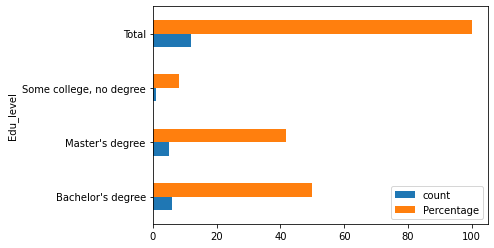

In [29]:
fig = plt.figure(figsize=(20, 20))

edu_interv.plot(kind="barh")
plt.draw()

plt.savefig("edu_interv.png")

plt.plot();

In [30]:
yrs_interv = df_interviewed.groupby("Yrs_Rel_wo_expr")["Appl_Id"].count().reset_index(name="count").set_index(
             'Yrs_Rel_wo_expr').rename(index={5: "Five_yrs", 6: "Six_yrs", 7: "Seven_yrs", 9: "Nine_yrs", 
             11: "Eleven_yrs", 14: "Fourteen_yrs"})
yrs_interv["Percentage"] = (yrs_interv/yrs_interv.sum()*100).round(2)  
yrs_interv.loc["Total",:] = yrs_interv.sum(axis=0) 
yrs_interv

,count,Percentage
Yrs_Rel_wo_expr,,
Five_yrs,3.0,25.00
Six_yrs,4.0,33.33
Seven_yrs,2.0,16.67
Nine_yrs,1.0,8.33
Eleven_yrs,1.0,8.33
Fourteen_yrs,1.0,8.33
Total,12.0,99.99


[]

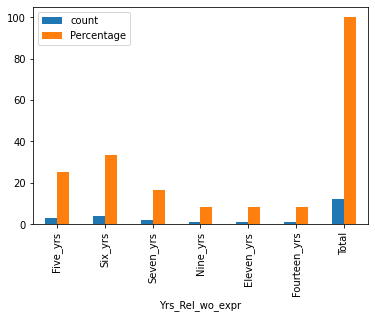

In [31]:
yrs_interv.plot(kind="bar")

plt.draw()

plt.savefig("yrs_interview.png")

plt.plot()

In [32]:
ap_data.shape

(60, 8)

### Condition that determines applicants that get an offer!

In [33]:
#First let's sort the "Yrs_Rel_wo_expr" to see the highest values
exp_sort = np.sort(ap_data["Yrs_Rel_wo_expr"])
exp_sort

array([ 1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  8,  9,  9, 10, 11, 14], dtype=int64)

In [34]:
#df_experience = df_interviewed.nlargest(5, ["Yrs_Rel_wo_expr"])
ap_data["Offer"] = np.where((ap_data["Yrs_Rel_wo_expr"]>=7) & (ap_data["Interviewed"]=="Yes"), "get_offer", "denied")
ap_data.head()

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed,Interviewed,Offer
0,1,Bachelor's degree,1,5,1,1,1,Yes,denied
1,2,Master's degree,1,5,1,1,1,Yes,denied
2,3,Associate's degree,1,3,1,1,1,No,denied
3,4,"Some college, no degree",1,7,1,1,1,Yes,get_offer
4,5,Master's degree,1,4,1,2,0,No,denied


### Filtering the applicants who they get the offer!

In [35]:

offer_data = ap_data[ap_data["Offer"] == "get_offer"]
offer_data

,Appl_Id,Edu_level,Visa_status,Yrs_Rel_wo_expr,Relevant_skills,Relevant_soft_skills,short_listed,Interviewed,Offer
3,4,"Some college, no degree",1,7,1,1,1,Yes,get_offer
21,22,Bachelor's degree,1,9,1,1,1,Yes,get_offer
52,53,Bachelor's degree,1,7,1,1,1,Yes,get_offer
58,59,Master's degree,1,11,1,1,1,Yes,get_offer
59,60,Master's degree,1,14,1,1,1,Yes,get_offer


In [36]:
edu_offer = offer_data.groupby("Edu_level")["Appl_Id"].count().reset_index(name="count").set_index('Edu_level') #.rename(index={1:'Male', 2: 'Female'})
edu_offer["Percentage%"] = (edu_offer/edu_offer.sum()*100).round(2)  
edu_offer.loc["Total",:] = edu_offer.sum(axis=0) 
edu_offer

,count,Percentage%
Edu_level,,
Bachelor's degree,2.0,40.0
Master's degree,2.0,40.0
"Some college, no degree",1.0,20.0
Total,5.0,100.0


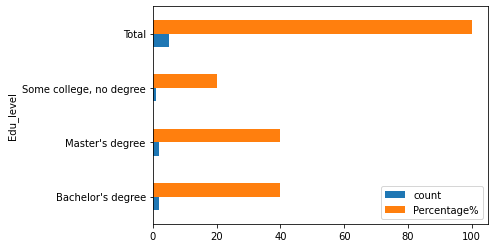

In [37]:
edu_offer.plot(kind="barh")
plt.draw()

plt.savefig("edu_offer.png")

plt.plot();

In [38]:
yrs_offer = offer_data.groupby("Yrs_Rel_wo_expr")["Appl_Id"].count().reset_index(name="count").set_index(
             'Yrs_Rel_wo_expr').rename(index={7: "Seven_yrs", 9: "Nine_yrs", 
             11: "Eleven_yrs", 14: "Fourteen_yrs"})
yrs_offer["Percentage"] = (yrs_offer/yrs_offer.sum()*100).round(2)  
#yrs_offer.loc["Total",:] = yrs_offer.sum(axis=0) 
yrs_offer

,count,Percentage
Yrs_Rel_wo_expr,,
Seven_yrs,2,40.0
Nine_yrs,1,20.0
Eleven_yrs,1,20.0
Fourteen_yrs,1,20.0


<Figure size 144x72 with 0 Axes>

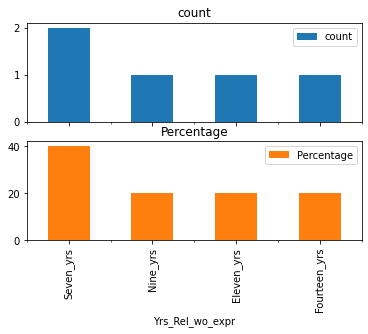

In [39]:
fig = plt.figure(figsize=(2, 1))
yrs_offer.plot(kind="bar", subplots=True, legend=True)
fig.tight_layout(pad=10.0)
plt.draw()
plt.savefig("yrs_offer.png")

plt.plot();

### Finally let's save this updated file to csv!!

In [41]:
ap_data.shape

(60, 9)

In [40]:
ap_data.to_csv("Applicant_updated.csv", index=False)